In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [24]:
added_classes = pd.read_csv ('Data/added_classes.csv')
class_0 = pd.read_csv ('Data/Class=0.csv')
class_1 = pd.read_csv ('Data/Class=1.csv')

In [25]:
added_classes

,NACCID,CDRSUM,DECIN,MOSLOW,MEMORY,SPEECH,BILLS,TRAVEL,MOFALLS,MOTREM,...,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOHOL,DIABETES,HYPERTEN,CVHATT,SEX,Class
0,NACC235922,3.5,1,0,1.0,-4,1,0,0,0,...,1,22,2,40,0,0,1,0,2,0
1,NACC383757,0.5,8,0,0.5,-4,0,0,0,0,...,1,15,5,28,2,0,1,0,1,0
2,NACC418253,2.0,1,0,1.0,-4,0,0,0,0,...,1,10,2,30,0,0,0,0,2,0
3,NACC433163,0.5,1,0,0.5,-4,8,0,0,1,...,1,2,2,17,0,0,0,0,1,0
4,NACC476187,5.0,1,0,1.0,-4,3,3,0,0,...,1,25,2,45,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13684,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13685,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13686,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13687,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0


# Analyze each cluster

In [26]:
# Group the data by cluster labels
cluster_groups = added_classes.groupby('Class')
id_column = 'NACCID'

# Loop through each cluster and analyze the characteristics
for cluster_label, cluster_data in cluster_groups:
    print(f"Cluster {cluster_label}:")
    # Get the statistics of numerical features within the cluster
    cluster_stats = cluster_data.drop(['Class', id_column], axis=1).describe()
    print(cluster_stats)

added_classes.head()

Cluster 0:
             CDRSUM         DECIN        MOSLOW        MEMORY        SPEECH  \
count  10884.000000  10884.000000  10884.000000  10884.000000  10884.000000   
mean       0.457093      0.911154      0.043183      0.186053     -0.428243   
std        0.859006      2.246606      0.203277      0.287771      1.326265   
min        0.000000      0.000000      0.000000      0.000000     -4.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.500000      1.000000      0.000000      0.500000      0.000000   
max        8.500000      9.000000      1.000000      2.000000      8.000000   

              BILLS        TRAVEL       MOFALLS        MOTREM       NACCAGE  \
count  10884.000000  10884.000000  10884.000000  10884.000000  10884.000000   
mean       0.218853     -0.025358      0.019478      0.021408     74.135244   
std        1.560643      0.897330      0

,NACCID,CDRSUM,DECIN,MOSLOW,MEMORY,SPEECH,BILLS,TRAVEL,MOFALLS,MOTREM,...,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOHOL,DIABETES,HYPERTEN,CVHATT,SEX,Class
0,NACC235922,3.5,1,0,1.0,-4,1,0,0,0,...,1,22,2,40,0,0,1,0,2,0
1,NACC383757,0.5,8,0,0.5,-4,0,0,0,0,...,1,15,5,28,2,0,1,0,1,0
2,NACC418253,2.0,1,0,1.0,-4,0,0,0,0,...,1,10,2,30,0,0,0,0,2,0
3,NACC433163,0.5,1,0,0.5,-4,8,0,0,1,...,1,2,2,17,0,0,0,0,1,0
4,NACC476187,5.0,1,0,1.0,-4,3,3,0,0,...,1,25,2,45,0,0,1,0,1,1


In [27]:
class_1.head()
class_1.describe()

,CDRSUM,DECIN,MOSLOW,MEMORY,SPEECH,BILLS,TRAVEL,MOFALLS,MOTREM,NACCAGE,...,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOHOL,DIABETES,HYPERTEN,CVHATT,SEX,Class
count,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,...,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.0
mean,5.947059,1.498396,0.418538,1.233868,0.075579,3.657754,2.326560,0.235651,0.180749,77.396791,...,1.005348,23.554724,2.333690,43.396435,0.218895,0.257754,0.747594,0.177897,1.387879,1.0
std,3.829129,2.007230,1.056641,0.655026,1.246390,2.454540,1.367661,0.948239,0.594603,9.301177,...,0.214423,19.521732,1.519214,14.545898,0.775333,0.887913,0.808147,0.734864,0.487354,0.0
min,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,3.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,72.000000,...,1.000000,10.000000,1.000000,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,5.000000,1.000000,0.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,78.000000,...,1.000000,20.000000,2.000000,43.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.0
75%,8.000000,1.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,84.000000,...,1.000000,30.000000,3.000000,53.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
max,18.000000,9.000000,9.000000,3.000000,8.000000,9.000000,9.000000,9.000000,9.000000,103.000000,...,9.000000,99.000000,9.000000,97.000000,9.000000,9.000000,9.000000,9.000000,2.000000,1.0


Class 1:

For CDRSUM, a majority of this group of participant is in the normal category in the clinical rating scale.

For DECIN, from the histogram, we can see that a majority of this group wasn't reported to have a decline in memory. However, there are still a few cases were reported to have a decline in memory or unknown.

For MOSLOW, almost all participants were reported to have no meaningful changes in motor function.

For MEMORY, from the pie chart, we can see that a majority of this group has no memory impairment. However, there are still a few cases that have questionable impaiment and a very little number of cases have moderate impairment.

For SPEECH, no severe cases were reported, a majority of participants have normal speech and a few cases were reported to have slight loss of expression, diction, and/or volume; or not available

For BILLS, a majority of this group encountered no difficulties in writing checks, paying bills, or balancing a checkbook. However, there are still a few cases that encountered some difficulties but do by themselves.

For TRAVEL, a majority of this group encountered no difficulties in traveling out of the neighborhood, driving, or arranging to take public transportation. However, there are still a few cases that encountered some difficulties but do by themselves.

For MOFALLS, a majority of this group didn't experience more falls during the process.

For MOTREM, a majority of this group didn't experience more tremors during the process.

For NACCAGE, this follows a normal distribution with a mean of 70, this means that most participants in this cluster are 70 years old.

For NACCBMI, the data distribution is roughly normal with a mean of 27.1. The IQR is from 24.1 to 29.5. This suggests that a majority of participants are within the normal range / slightly overweight.   

For TOBAC30, a majority of this group didn't smoke during the last 30 days.

For TOBAC100, of those who smoke throughout their life, 50% smoked more than 100 cigarrets throughout their life, 50% smoked less than 100.

For SMOKYRS, about half of the participants didn't smoke at all.

For QUITSMOK, participants of this cluster quit smoking at various ages, but quitting is most popular at the mid 30s, early 50s and late 60s.

For ALCOHOL, almost all participants did not abuse alcohol with a few cases did in the past but now inactive.

For DIABETES, almost all participants did not have diabetes or inactive diabetes with a few cases is currently having diabetes.

For HYPERTEN, half of the participants do not have hypertension, the other half have but this can be explained because of their old age.

For CVHATT, almost all participants did not have heart attack/cardiac arrest or inactive heart attack/cardiac arrest.

For SEX, a little more than half of the participants in this cluster are female.

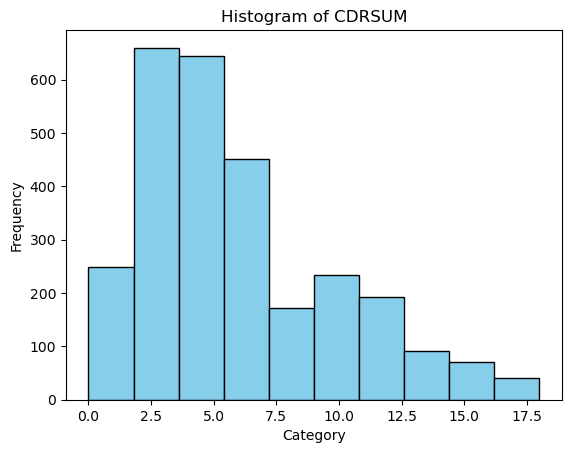

In [28]:
# Create histogram
plt.hist(class_1['CDRSUM'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of CDRSUM')

# Show plot
plt.show()

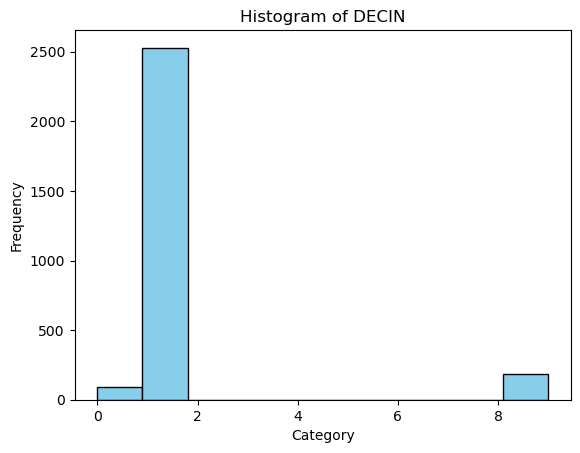

In [29]:
# Create histogram
plt.hist(class_1['DECIN'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of DECIN')

# Show plot
plt.show()

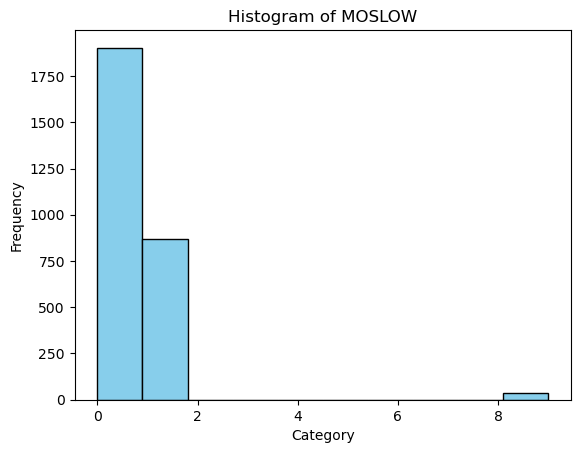

In [30]:
# Create histogram
plt.hist(class_1['MOSLOW'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of MOSLOW')

# Show plot
plt.show()

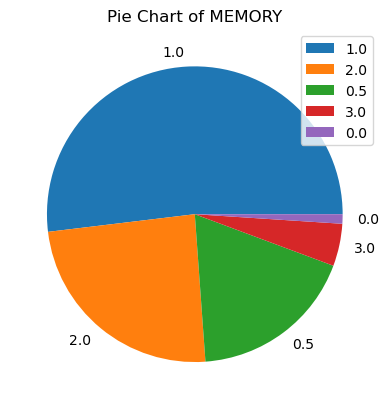

In [31]:
# Create pie chart
memory = class_1['MEMORY'].value_counts()

# Plotting pie chart
plt.pie(memory, labels=memory.index)

# Add title
plt.title('Pie Chart of MEMORY')
plt.legend()
# Show plot
plt.show()

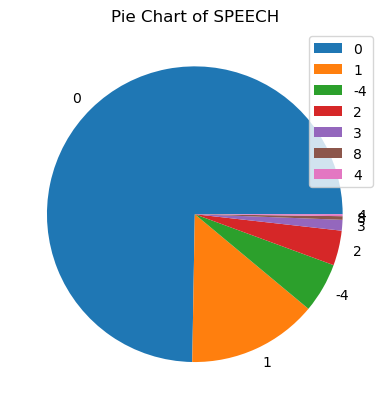

In [32]:
# Create pie chart
speech = class_1['SPEECH'].value_counts()

# Plotting pie chart
plt.pie(speech, labels=speech.index)

# Add title
plt.title('Pie Chart of SPEECH')
plt.legend()
# Show plot
plt.show()

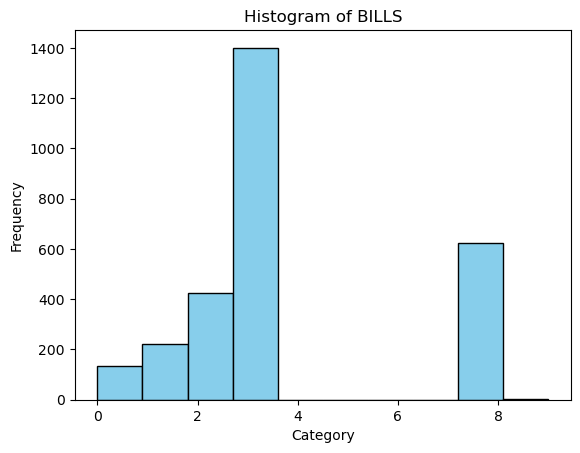

In [33]:
# Create histogram
plt.hist(class_1['BILLS'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of BILLS')

# Show plot
plt.show()

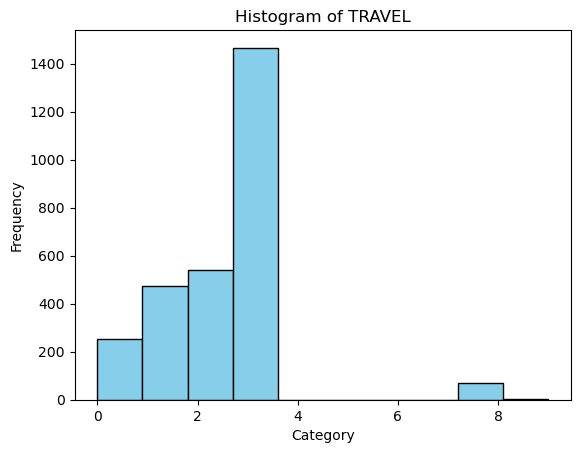

In [34]:
# Create histogram
plt.hist(class_1['TRAVEL'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of TRAVEL')

# Show plot
plt.show()

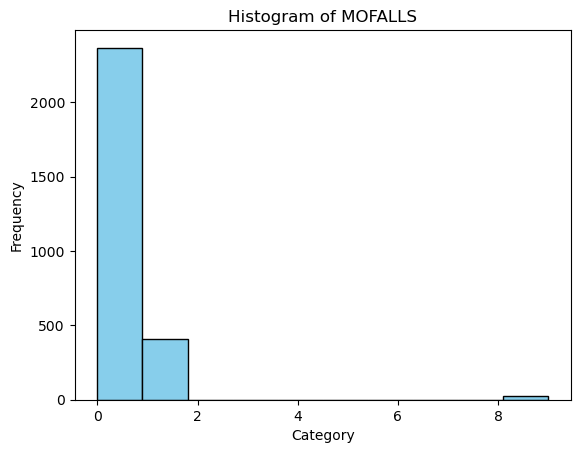

In [35]:
# Create histogram
plt.hist(class_1['MOFALLS'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of MOFALLS')

# Show plot
plt.show()

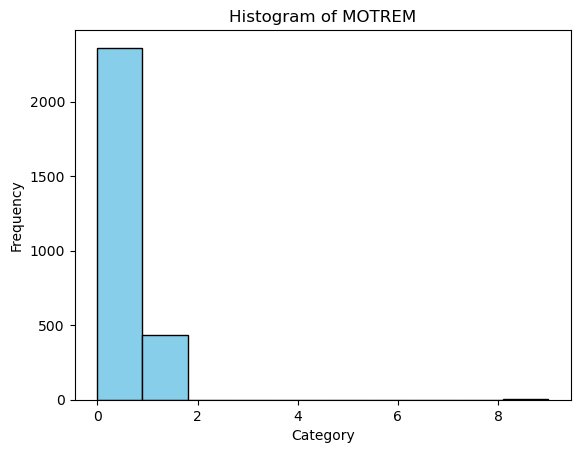

In [36]:
# Create histogram
plt.hist(class_1['MOTREM'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of MOTREM')

# Show plot
plt.show()

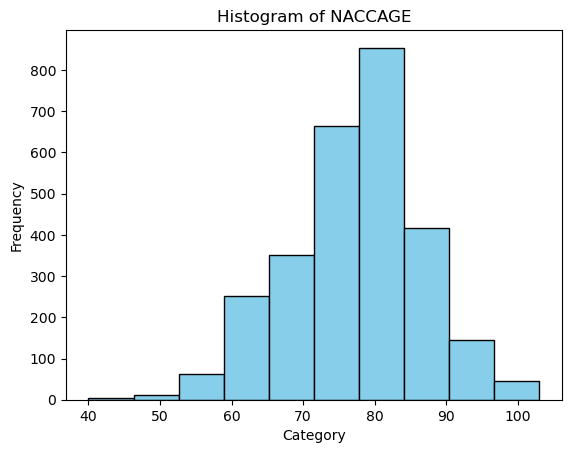

In [37]:
# Create histogram
plt.hist(class_1['NACCAGE'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of NACCAGE')

# Show plot
plt.show()

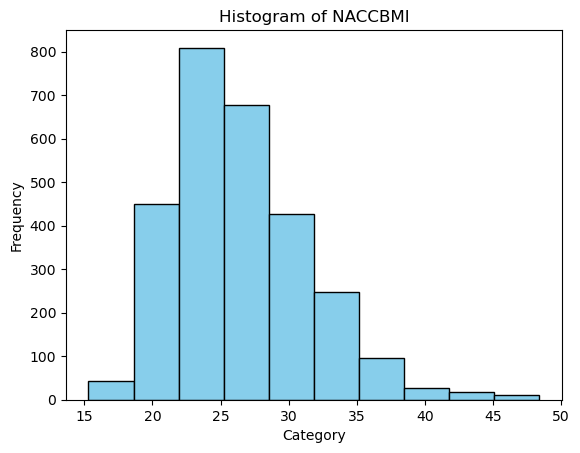

In [38]:
# Create histogram
plt.hist(class_1['NACCBMI'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of NACCBMI')

# Show plot
plt.show()

In [39]:
cluster_2['NACCBMI'].describe()

NameError: name 'cluster_2' is not defined

In [ ]:
# Create histogram
plt.hist(class_1['TOBAC30'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of TOBAC30')

# Show plot
plt.show()

In [ ]:
# Create histogram
plt.hist(class_1['TOBAC100'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of TOBAC100')

# Show plot
plt.show()

In [ ]:
# Create histogram
plt.hist(class_1['SMOKYRS'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of SMOKYRS')

# Show plot
plt.show()

In [ ]:
# Create histogram
plt.hist(class_1['QUITSMOK'], bins =100, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of QUITSMOK')

# Show plot
plt.show()

In [ ]:
# Create histogram
plt.hist(class_1['ALCOHOL'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of ALCOHOL')

# Show plot
plt.show()

In [ ]:
# Create histogram
plt.hist(class_1['DIABETES'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of DIABETES')

# Show plot
plt.show()

In [ ]:
# Create histogram
plt.hist(class_1['HYPERTEN'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of HYPERTEN')

# Show plot
plt.show()

In [ ]:
# Create histogram
plt.hist(class_1['CVHATT'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of CVHATT')

# Show plot
plt.show()

In [ ]:
# Create pie chart
sex = class_1['SEX'].value_counts()

# Plotting pie chart
plt.pie(sex, labels=sex.index)

# Add title
plt.title('Pie Chart of SEX')
plt.legend()
# Show plot
plt.show()

In [ ]:
class_0.head()
class_0.describe()